In [ ]:
#importing nessacerry libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
from pmdarima import auto_arima
import pmdarima as pm
!pip install Prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

!pip install --upgrade xlrd

In [ ]:
#importing testing dataset
test=pd.read_csv('/content/test.csv')
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [ ]:
#importing training dataset
train=pd.read_csv('/content/train.csv')
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
test.shape,train.shape

((45000, 4), (913000, 4))

In [ ]:
test.isna().sum()

id       0
date     0
store    0
item     0
dtype: int64

In [ ]:
train.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
test.dtypes

id        int64
date     object
store     int64
item      int64
dtype: object

In [ ]:
train.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [ ]:
test.describe(include='all')

,id,date,store,item
count,45000.000000,45000,45000.000000,45000.00000
unique,NaN,90,NaN,NaN
top,NaN,2018-01-01,NaN,NaN
freq,NaN,500,NaN,NaN
mean,22499.500000,NaN,5.500000,25.50000
std,12990.525394,NaN,2.872313,14.43103
min,0.000000,NaN,1.000000,1.00000
25%,11249.750000,NaN,3.000000,13.00000
50%,22499.500000,NaN,5.500000,25.50000
75%,33749.250000,NaN,8.000000,38.00000


In [ ]:
train.describe(include='all')

,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
unique,1826,NaN,NaN,NaN
top,2013-01-01,NaN,NaN,NaN
freq,500,NaN,NaN,NaN
mean,NaN,5.500000,25.500000,52.250287
std,NaN,2.872283,14.430878,28.801144
min,NaN,1.000000,1.000000,0.000000
25%,NaN,3.000000,13.000000,30.000000
50%,NaN,5.500000,25.500000,47.000000
75%,NaN,8.000000,38.000000,70.000000


#DATA PREPROCESSING

In [ ]:
# ID is a unique number for each row and not needed for precidtion
test = test.drop('id', axis =1)

In [ ]:
#missing value handling
train['sales'].unique()

array([ 13,  11,  14,  10,  12,   9,   7,   5,  16,  18,  15,   8,   6,
        21,  20,  17,  22,  19,  24,  23,  26,  25,  27,  38,  34,  29,
        31,  30,   4,  36,  28,  33,  32,  37,  35,  43,  40,  41,  39,
        42,  50,  45,  44,  47,  53,  49,  46,  48,  51,  58,  54,  57,
        55,  52,   3,   2,   1,  59,  56,  60,  63,  69,  64,  67,  65,
        71,  61,  73,  62,  82,  78,  68,  74,  70,  87,  66,  77,  88,
        76,  75, 102,  72,  92,  86,  79,  85,  81,  90,  84,  80, 103,
        97,  96,  95,  89, 104,  94, 100,  91,  83, 106, 101,  98, 115,
        93, 111, 119,  99, 108, 110, 120, 105, 126, 109, 114, 113, 112,
       121, 107, 117, 118, 139, 124, 131, 123, 138, 134, 127, 136, 116,
       125, 122, 128, 150, 129, 135, 137, 132, 133, 145, 130, 144,   0,
       148, 141, 140, 152, 147, 169, 156, 159, 153, 142, 157, 155, 163,
       143, 154, 165, 146, 160, 158, 151, 164, 171, 161, 177, 162, 175,
       181, 168, 167, 149, 174, 170, 176, 178, 166, 173, 187, 18

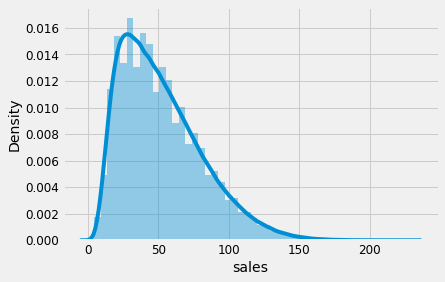

In [ ]:
#nan is missing value it need to be replaced
sns.distplot(train['sales'])

since right scewed we can take median

In [ ]:
train['sales']= train['sales'].fillna(train['sales'].median())

In [ ]:
train.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

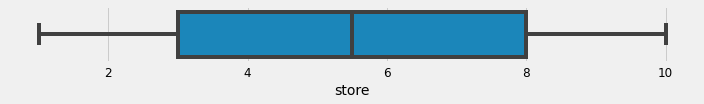

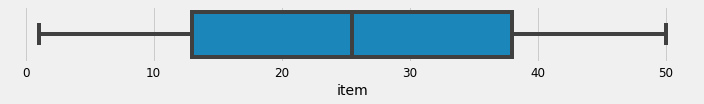

In [ ]:
for i, feature in enumerate(test.select_dtypes(include=[np.float64,np.int64]).columns):
    plt.figure(figsize=(10,10))
    plt.subplot(7,1, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(test[feature])
    plt.tight_layout()

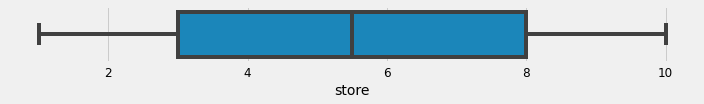

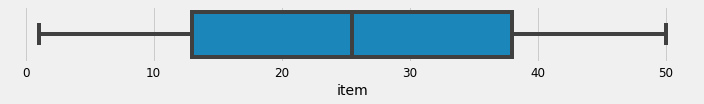

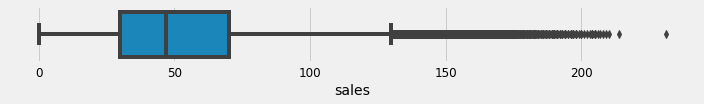

In [ ]:
for i, feature in enumerate(train.select_dtypes(include=[np.float64,np.int64]).columns):
    plt.figure(figsize=(10,10))
    plt.subplot(7,1, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(train[feature])
    plt.tight_layout()

Here we can neglect outlier in sales

In [ ]:
test.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
train.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
test.store.value_counts()

1     4500
2     4500
3     4500
4     4500
5     4500
6     4500
7     4500
8     4500
9     4500
10    4500
Name: store, dtype: int64

In [ ]:
train.store.value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store, dtype: int64

In [ ]:
#let us consider store 1
store1 = train.loc[train['store'] == 1]
store1

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
896561,2017-12-27,1,50,38
896562,2017-12-28,1,50,52
896563,2017-12-29,1,50,59
896564,2017-12-30,1,50,66


In [ ]:
store1['date'].min(), store1['date'].max()

('2013-01-01', '2017-12-31')

In [ ]:
#here we are taking only date and sales
store1 = store1[['date','sales']]
store1.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [ ]:
store1 = store1.sort_values('date')
store1 = store1.groupby('date')['sales'].sum().reset_index()
store1.head()

,date,sales
0,2013-01-01,1316
1,2013-01-02,1264
2,2013-01-03,1305
3,2013-01-04,1452
4,2013-01-05,1499


In [ ]:
store1 = store1.set_index('date')
store1.head()

,sales
date,
2013-01-01,1316
2013-01-02,1264
2013-01-03,1305
2013-01-04,1452
2013-01-05,1499


In [ ]:
import datetime
store1.index = pd.to_datetime(store1.index, errors='coerce')
store1.replace(np.NaN, pd.NaT)
monthly = store1['sales'].resample('MS').mean()

In [ ]:
monthly

date
2013-01-01    1325.064516
2013-02-01    1475.214286
2013-03-01    1800.870968
2013-04-01    2050.766667
2013-05-01    2234.580645
2013-06-01    2384.366667
2013-07-01    2500.870968
2013-08-01    2249.838710
2013-09-01    2080.266667
2013-10-01    1907.419355
2013-11-01    2082.166667
2013-12-01    1484.806452
2014-01-01    1541.548387
2014-02-01    1708.500000
2014-03-01    2055.774194
2014-04-01    2371.633333
2014-05-01    2584.129032
2014-06-01    2739.866667
2014-07-01    2883.516129
2014-08-01    2574.000000
2014-09-01    2371.133333
2014-10-01    2217.419355
2014-11-01    2416.866667
2014-12-01    1690.806452
2015-01-01    1607.806452
2015-02-01    1768.928571
2015-03-01    2130.838710
2015-04-01    2490.033333
2015-05-01    2694.290323
2015-06-01    2824.833333
2015-07-01    3031.258065
2015-08-01    2691.677419
2015-09-01    2479.633333
2015-10-01    2339.354839
2015-11-01    2476.400000
2015-12-01    1764.548387
2016-01-01    1759.967742
2016-02-01    1921.448276
2016-03

#**Visualizing the Sales Time Series Data**

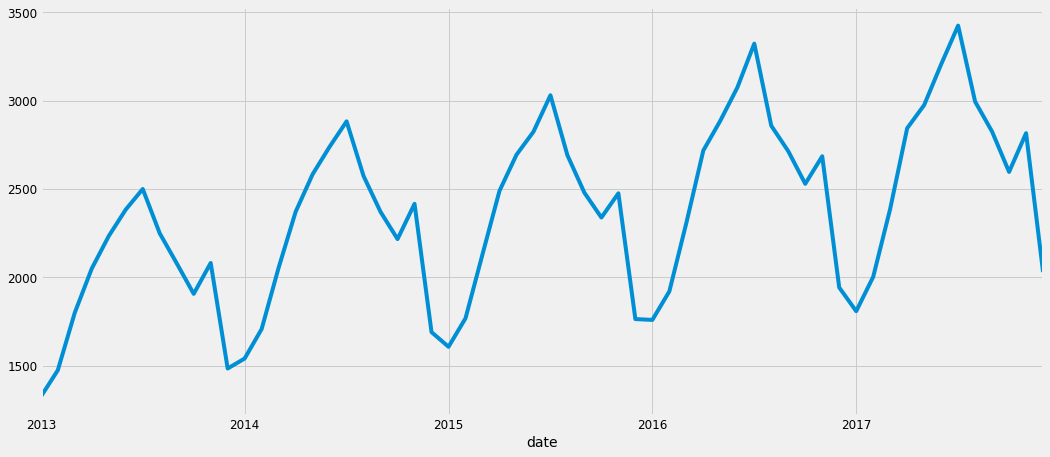

In [ ]:
monthly.plot(figsize = (16, 7))
plt.show()

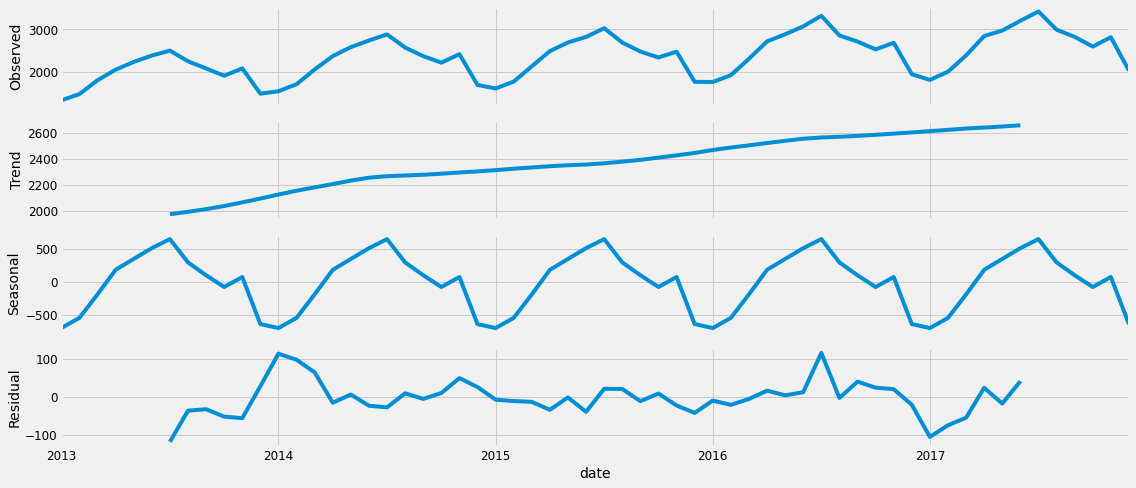

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

#**Time Series Forecasting with ARIMA**

Autoregressive Integrated Moving Average (ARIMA) is a commonly used method for time-series prediction. ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [ ]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter selection for our STORE1 sales ARIMA Time Series Model. Our goal here is to use a "grid search" to find the optimal set of parameters that yields the best performance for our model.

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1089.194705033009
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:821.0328318836632
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:631.7347785214846
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1295.1252622772993
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:582.6356883259804
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:557.6115265303426
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:436.5954026246267
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1085.8525360723477
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1005.2997669911571
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:756.6101403719551
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:566.7733423426482
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1198.5389554703036
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:548.1136626010305
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:522.6463103851529
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:414.659689927627
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:944.5391227706622
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:833.2719769967965
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:630.4159283318011
ARIMA(0

#**Fitting the ARIMA Model using the Optimal parameters**

In [ ]:
mod = sm.tsa.statespace.SARIMAX(monthly, order = (1,1,1),
                               seasonal_order = (1,1,0,12),
                               enforce_invertibility = False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0314      2.084      0.015      0.988      -4.052       4.115
ma.L1         -0.1502      2.083     -0.072      0.943      -4.232       3.932
ar.S.L12      -0.1240      0.178     -0.697      0.486      -0.473       0.225
sigma2      2763.4187    572.525      4.827      0.000    1641.290    3885.547


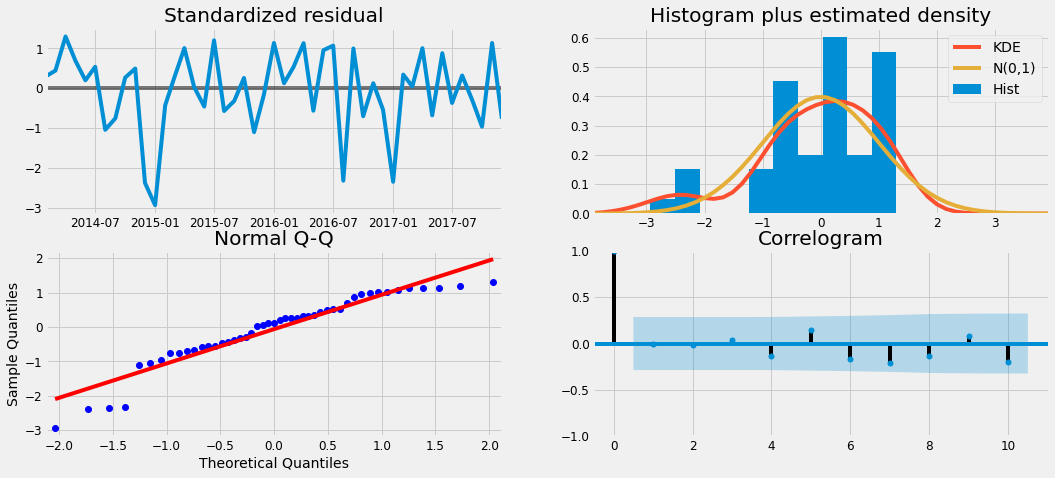

In [ ]:
results.plot_diagnostics(figsize = (16,7))
plt.show()

#**Validating Forecasts** 

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

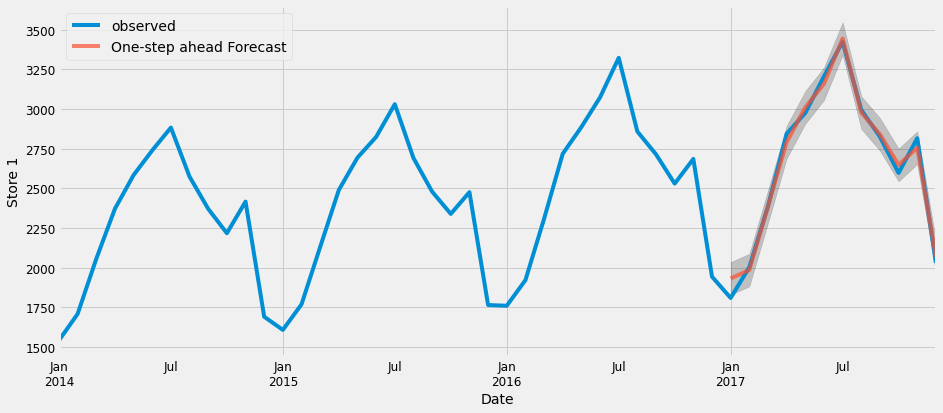

In [ ]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = monthly['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Store 1')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

The grey area shows the confidence interval.

In [ ]:
monthly_forecasted = pred.predicted_mean
monthly_truth = monthly['2017-01-01':]

mse = ((monthly_forecasted -monthly_truth)**2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2531.48


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 50.31


# Producting and Visualizing Forecasts

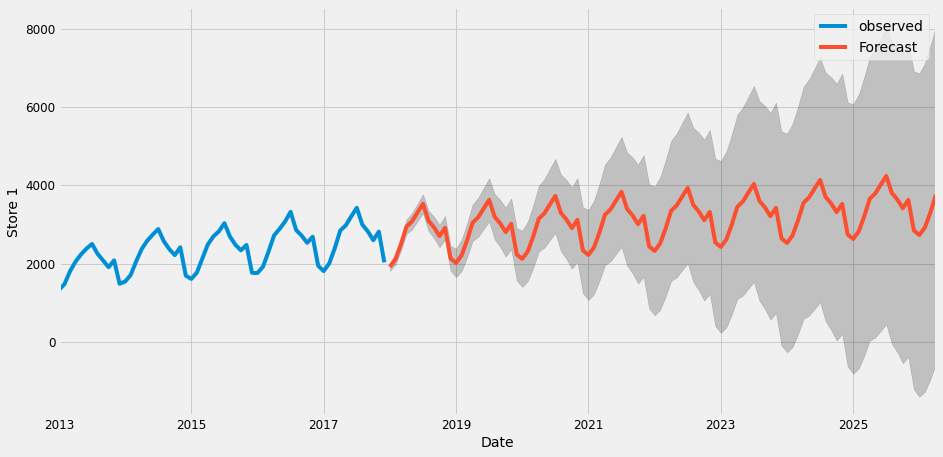

In [ ]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = monthly.plot(label = 'observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Store 1')
plt.legend()
plt.show()

Our ARIMA prediction model clearly captured the Store1 sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our predicted values (the expansion of the grey area).

#**Visualizing the Sales Data**

In [ ]:
Store1 = train.loc[train['store'] == 1]
Store1 = Store1[['date', 'sales']]
Store1 = Store1.sort_values('date')
Store1 = Store1.groupby('date')['sales'].sum().reset_index()
Store1.head()

,date,sales
0,2013-01-01,1316
1,2013-01-02,1264
2,2013-01-03,1305
3,2013-01-04,1452
4,2013-01-05,1499


In [ ]:
Store2 = train.loc[train['store'] == 2]
Store2 = Store2[['date', 'sales']]
Store2 = Store2.sort_values('date')
Store2 = Store2.groupby('date')['sales'].sum().reset_index()
Store2.head()

,date,sales
0,2013-01-01,1742
1,2013-01-02,1808
2,2013-01-03,1887
3,2013-01-04,1983
4,2013-01-05,2087


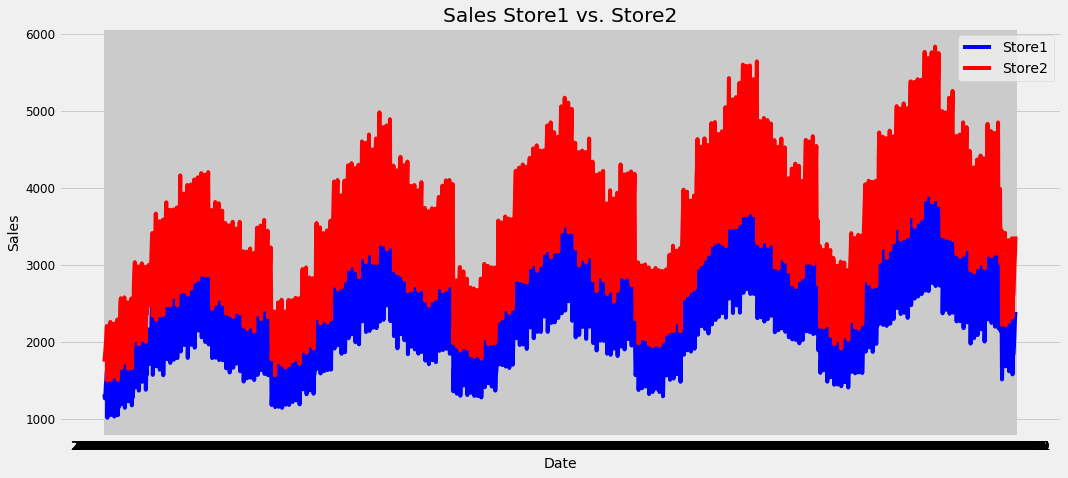

In [ ]:
plt.figure(figsize = (16, 7))
plt.plot( Store1['date'],Store1['sales'], 'b-', label = 'Store1')
plt.plot(Store2['date'], Store2['sales'], 'r-', label = 'Store2')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Store1 vs. Store2')
plt.legend()
plt.show()

#**Time Series Modeling with Prophet**

Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1152x504 with 0 Axes>

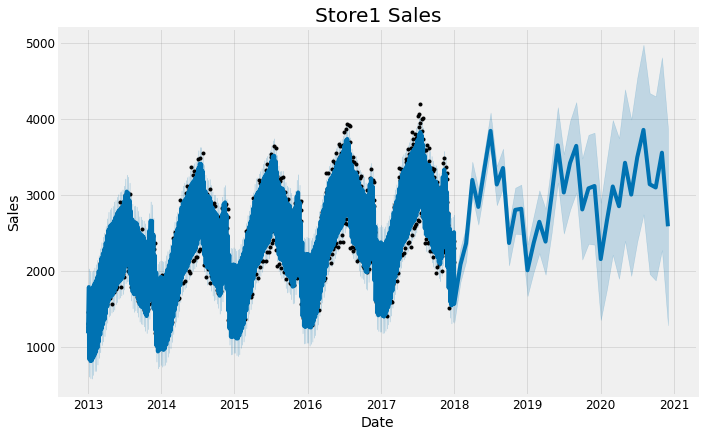

In [ ]:
from fbprophet import Prophet
Store1 = Store1.rename(columns={'date': 'ds', 'sales': 'y'})
S1model = Prophet(interval_width = 0.95)
S1model.fit(Store1)

Store2 = Store2.rename(columns={'date': 'ds', 'sales': 'y'})
S2model = Prophet(interval_width=0.95)
S2model.fit(Store2)

S1forecast = S1model.make_future_dataframe(periods = 36, freq = 'MS')
S1forecast = S1model.predict(S1forecast)

S2forecast = S2model.make_future_dataframe(periods = 36, freq = 'MS')
S2forecast = S2model.predict(S2forecast)

plt.figure(figsize = (16,7))
S1model.plot(S1forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Store1 Sales')
plt.show()

<Figure size 1152x504 with 0 Axes>

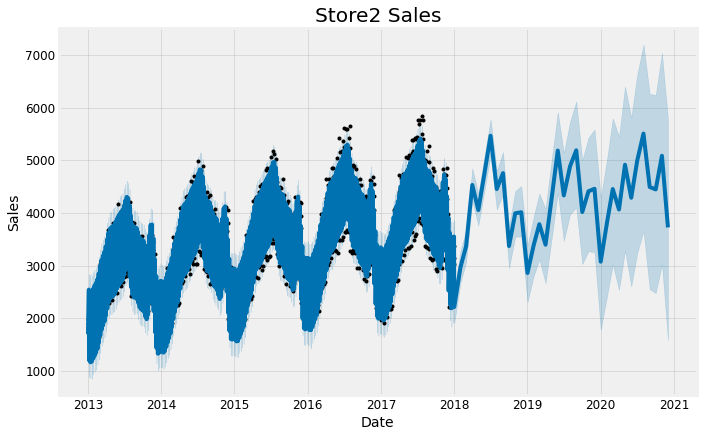

In [ ]:
plt.figure(figsize = (16,7))
S2model.plot(S2forecast, xlabel = 'Date', ylabel = 'Sales')

plt.title('Store2 Sales')
plt.show()

#**Trends and Patterns**

Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

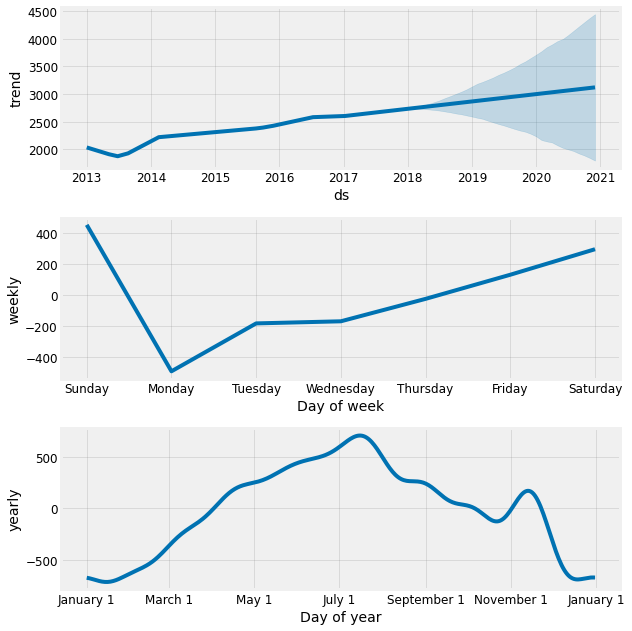

In [ ]:
S1model.plot_components(S1forecast)
plt.show()

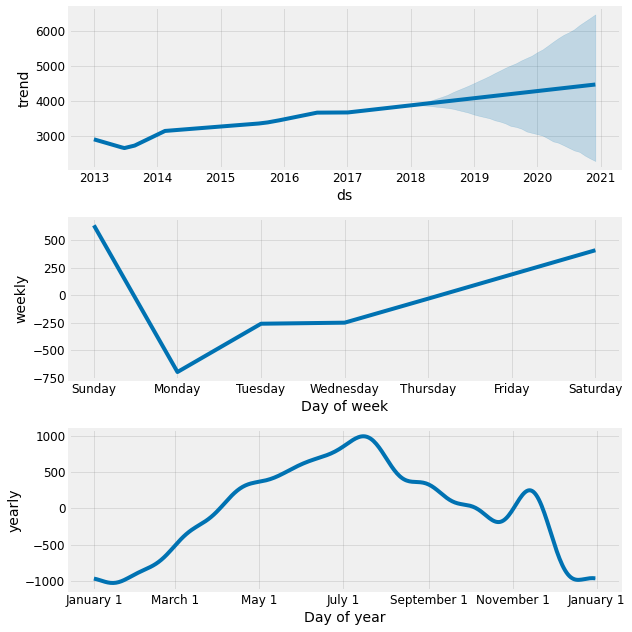

In [ ]:
S2model.plot_components(S2forecast)
plt.show()

We can see that sales of both stores are increasing by years moth of July have more sales compared to other months also increase in treand of sales in store 1 and store 2